# _*Experiment with the Bernstein-Vazirani Algorithm in Aqua*_

This notebook demonstrates how to experiment with the `Bernstein-Vazirani` algorithm in `Qiskit Aqua`.

We first import all necessary modules.

In [1]:
import math
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua import run_algorithm
from qiskit.aqua.algorithms import BernsteinVazirani
from qiskit.aqua.components.oracles import TruthTableOracle

The Bernstein-Vazirani algorithm is explained in more detail in the corresponding notebook located in the directory `community/algorithms`. We can experiment with it in Aqua by feeding it oracles created using truth tables. For example, we can create a `TruthTableOracle` instance as follows.

In [2]:
bitstr = '00111100'
oracle = TruthTableOracle(bitstr)

As shown, the truthtable is specified with the `bitstr` containing values of all entries in the table. It has length $8$, so the corresponding truth table is of $3$ input bits. The truthtable represents the function mappings as follows.

- $\mathbf{a} \cdot 000 \mod 2 = 0$
- $\mathbf{a} \cdot 001 \mod 2 = 0$
- $\mathbf{a} \cdot 010 \mod 2 = 1$
- $\mathbf{a} \cdot 011 \mod 2 = 1$
- $\mathbf{a} \cdot 100 \mod 2 = 1$
- $\mathbf{a} \cdot 101 \mod 2 = 1$
- $\mathbf{a} \cdot 110 \mod 2 = 0$
- $\mathbf{a} \cdot 111 \mod 2 = 0$

And obviously the goal is to find the bitstring $\mathbf{a}$ that satisfies all the inner product equations.

We can inspect the circuit corresponding to the binary function encoded in the `TruthTableOracle` instance.

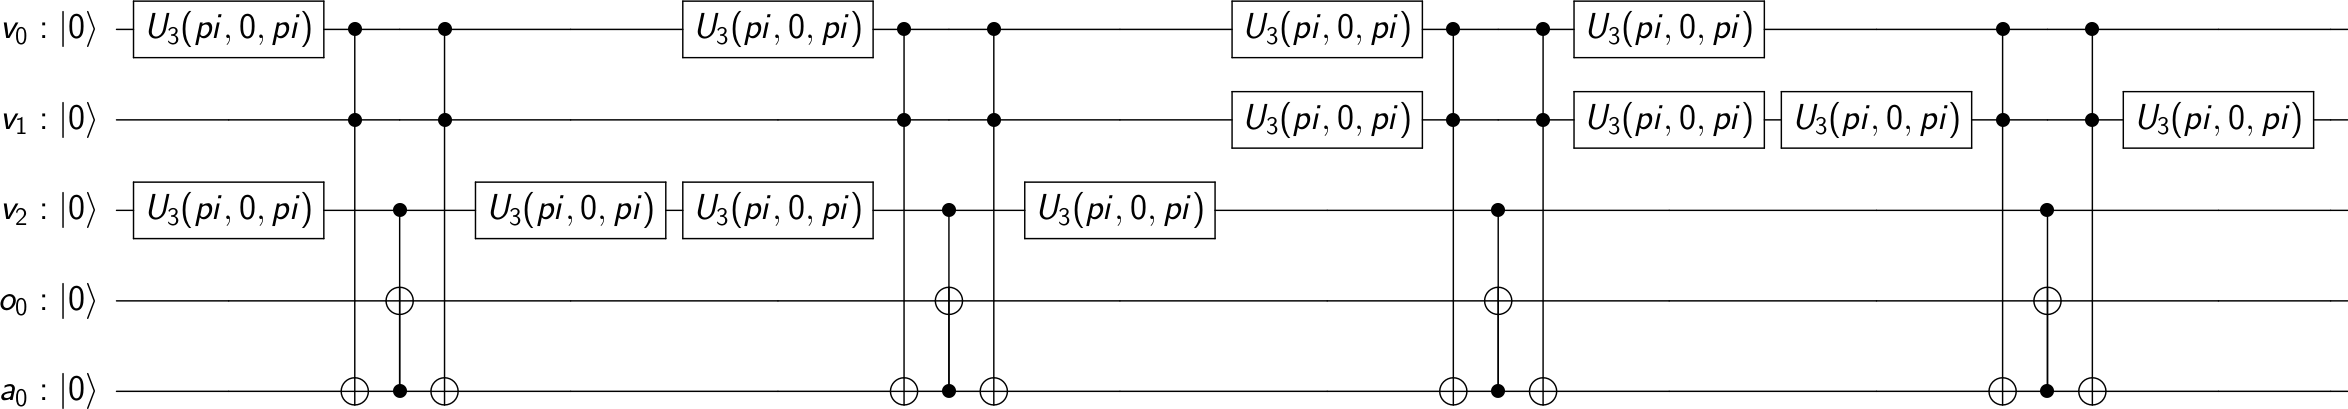

In [3]:
oracle.circuit.draw(output='latex')

As seen, the $v_i$'s correspond to the 3 input bits; the $o_0$ is the oracle's output qubit; the $a_0$ is an ancilla qubit.

Let us first compute the groundtruth $\mathbf{a}$ classically:

In [4]:
a_bitstr = ""
num_bits = math.log2(len(bitstr))
for i in reversed(range(3)):
    bit = bitstr[2 ** i]
    a_bitstr += bit
print(f'The groundtruth result bitstring is {a_bitstr}.')

The groundtruth result bitstring is 110.


Next we can create a `BernsteinVazirani` instance using the oracle, and run it to check the result against the groundtruth.

In [5]:
bv = BernsteinVazirani(oracle)
backend = BasicAer.get_backend('qasm_simulator')
result = bv.run(QuantumInstance(backend, shots=1024))
print('The result bitstring computed using Bernstein-Vazirani is {}.'.format(result['result']))
assert(result['result'] == a_bitstr)

The result bitstring computed using Bernstein-Vazirani is 110.


The above step-by-step programatic approach can also be achieved by using a json configuration dictionary with the parameters for the algorithm and any other dependent objects it requires, as follows:

In [6]:
params = {
    'problem': {
        'name': 'hiddenstringfinding',
    },
    'algorithm': {
        'name': 'BernsteinVazirani'
    },
    'oracle': {
        'name': 'TruthTableOracle',
        'bitmaps': [bitstr]
    },
    'backend': {
        'shots': 1024,
    },
}

result_dict = run_algorithm(params, backend=backend)
print('The result bitstring computed using Bernstein-Vazirani is {}.'.format(result_dict['result']))
assert(result_dict['result'] == a_bitstr)

The result bitstring computed using Bernstein-Vazirani is 110.
